

### Case study: E-Commerce Category Classifier
 <br>
 
Provided in this folder there is a CSV file (file is currently removed) with the name of items through six different categoreis: **Book, Grocery, Music, Toy, Office & Watch**.

The goal is to train a Machine Learning model that will be able to predict the category of an item using only the title, since the category might be missing sometimes. 

The required tasks:
 <br> 
1. Load the data. As the information has only two labels, not much preparation is needed. 

<div class="alert alert-block alert-success">
<b>Optional:</b> Most of the entries are in English, but some titles might be in other languages. 
Removing the entries in other languages might improve the model performance so feel free to remove them before training (feel free to use 3rd party libraries!)
</div>

2. Test three different classification models. Represent their performance visually through confussion matrices/classification reports & choose the best model. Use grid search to pick the best hyper-parameters. Justify your decisions. 
  <br>
3. In order to make predictions the text has to be transformed into an usable vector (in case of doubt, you can refer to `help(sklearn.feature_extraction.text.TfidfVectorizer`). Build a pipeline that includes at least the vectorizer & the classifcation model you chose, so that a prediction can be made by directly inputing a text label.
 <br>
4. Add a prediction label to the original dataframe & plot the results divided by category & number of correct predictions.
 <br>
5. Update the "predictions" dictionary with the corresponding prediction from the final model. Use the pipeline!
  <br>
5. *Optional: attached with the results include a .joblib file called "category_classifier" with the model ready to use!*

 <br> 




In [ ]:
predictions = {
    
"Classical Flute in C": None,

"Harry Potter & the prisioner of Azkaban hardcover": None,

"Digital casio with alarm": None,

"Document shredder with three velocities": None,

"Puzzle 1000 pieces Mona Lisa": None,

"Pringles sour cream an onion 12 pack": None

                }

***

## Summary of my approach to the tasks - 31/10/2022

***

### List of sections to answer the tasks:

 ##### Task 1 (EDA). loaded the data into a df, check shape, looking for unique elements, missing values (NaNs), and counts
 
 ##### Task 2. and 3 . Test three different classification models. Used tfidf vectorization and model in a pipeline, and did grid search
 
   * Data preparation:
            . Prepared data in form of corpus and labels (X and y).
            . Splitted to train and test datasets
            . Assigned initial tfidf parameters
            . Made a custom function for reporting
        
   * Estimator Selection: according to sklearn documentation, and research for 'multiclass text classification'.
     
            . Naive Bayes (MultinomialNB)
            . Logistic Regression (LogisticRegressionCV)
            . Linear SVC (LinearSVC)
      
Procedure for all 3 models: Apply the pipeline with initial parameters, plot performance, check pipeline parameters, optimize hyperparameters using gridsearch, check gridsearch best_params and plot its performance.

* Metrics:
summary of useful metrics for imbalanced multiclass classification. Later f1-score is mainly used for evaluations. 
      
 ##### Task 4. Add a prediction label to the original dataframe & plot the results divided by category & number of correct predictions.
 
Here, the best pipeline was trained on the whole dataset, 2 plots are prepared showing True and False perdictions for each cathegory, one having linear count scale, the other log count scale for better visualization.

 ##### Task 5. Update the "predictions" dictionary 
 used best_pipe (which was trained on the complete dataset) to predict missing labels.

 ##### Task 6 Optional: attached with the results include a .joblib file called "category_classifier" 
 The best_pipe is saved as category_classifier.joblib
 
 ##### Optional Task (in Green):
 Checked if model performance increases with removing the non-english entries.
        
       

In [98]:
# import liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import langdetect

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from spacy_cld import LanguageDetector

# Task 1.  (EDA)

In [2]:
df = pd.read_csv('Assessment_Center_Siamak.csv')
df_original = df.copy()
df.head(5)

,Category,Title
0,Office,Apli Kids Roll of Stickers Round Ø 15 mm Pink
1,Toy,MAXEE Golden Balloon 32 Inch Birthday Balloon ...
2,Office,STAEDTLER 550 02 Noris School Compass with Cen...
3,Watch,Liebeskind Berlin Women's Analogue Quartz Cloc...
4,Toy,"Pool Toys for Kids Adults, 2 Packs Water Guns ..."


In [3]:
#Check the shape
df.shape

(21484, 2)

In [4]:
#Check the number of unique values
df['Category'].nunique() , df['Title'].nunique()

(6, 21484)

In [5]:
# looking for NaNs
df['Title'].isnull().sum(), df['Category'].isnull().sum() 

(0, 0)

In [6]:
# Check unique categories
df['Category'].unique()

array(['Office', 'Toy', 'Watch', 'Grocery', 'Book', 'Music'], dtype=object)

<AxesSubplot:>

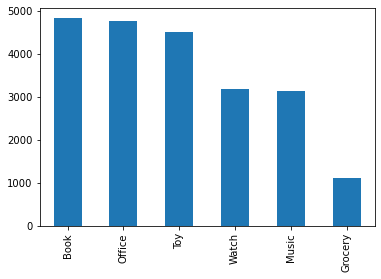

In [7]:
# Plot the number of items in each category. The dataset is a slighly imbalanced.
df['Category'].value_counts().plot(kind='bar')

# Task 2. and 3. 
### Test three different classification models. Use tfidf vectorization and model in a pipeline, and optimize hyperparameters.

#### Data Preparaton 
 For tifidf as an alternative to other methods e.g. BOW and CountVectorizer

In [8]:
# preparing the corpus and labels in form of a list
corpus = df['Title'].tolist()
labels = df['Category'].tolist()

In [9]:
# Split
X_train, X_test, y_train, y_test = train_test_split(corpus,labels, test_size=0.2, random_state=42, stratify=labels)

In [10]:
# Assign tfidf parameters, easy to access
tfidf_params = dict(sublinear_tf = True,
                   min_df = 5,
                   norm = 'l2',
                   ngram_range=(1,2),
                   stop_words = 'english')

#### custom function:

In [11]:
# Takes the pipeline name, and test datasets, gives classification_report and confusion matrix:
def get_scores(mypipeline, Xtest, ytest ):
    ypred = mypipeline.predict(Xtest)
    print(classification_report(ytest,ypred))
    cm = confusion_matrix(ytest, ypred, 
                          #normalize='all'
                         )    
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()

## Estimator Selection:

 According to sklearn documentation as a rough guid (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) and research for classifiers for multiclass text classification.

+ Naive Bayes
+ LogisticRegression
+ Linear SVC

## Metrics:

recall or TPR (True Positive Rate): $\frac{\text{TP}}{\text{P}} = \frac{\text{TP}}{\text{TP} + \text{FN}}$  

precision: $\frac{\text{TP}}{\text{TP} + \text{FP}}$   

f1-score: harmonic mean of recall and precision:    $\text{2}.\frac{\text{precision}.\text{recall}}{\text{precision} + \text{recal}}$  

Recall and precicsion are the two most common metrics that take into account class imbalance. The f1-score is harmonic mean of recall and precision and a popular metric for imbalanced classification. In this classification task that we have slight class imbalance, f1 is a more reliable score for model selection. 

## Naive Bayes (MultinomialNB)

In [12]:
# create a Pipeline that will do features transformation then pass to the selected model
clf_MNB = Pipeline(steps=[
    ('features', TfidfVectorizer(**tfidf_params)),
    ('model',  MultinomialNB())
])

In [13]:
# Use classifier pipeline as a model, fit X_train and y_train
clf_MNB.fit(X_train, y_train)

Pipeline(steps=[('features',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('model', MultinomialNB())])

In [14]:
y_pred = clf_MNB.predict(X_test)

              precision    recall  f1-score   support

        Book       0.93      0.92      0.93       964
     Grocery       0.97      0.72      0.82       223
       Music       0.95      0.93      0.94       625
      Office       0.88      0.94      0.91       951
         Toy       0.88      0.91      0.89       899
       Watch       0.98      0.98      0.98       635

    accuracy                           0.92      4297
   macro avg       0.93      0.90      0.91      4297
weighted avg       0.92      0.92      0.92      4297



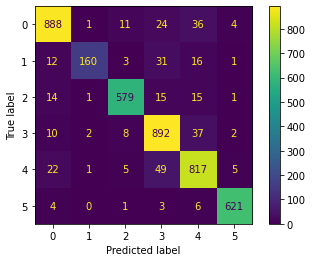

In [15]:
# use the custom function for reporting
get_scores(clf_MNB, X_test, y_test)

In [16]:
# checking the model params for the gridsearch later
clf_MNB.get_params()

{'memory': None,
 'steps': [('features',
   TfidfVectorizer(min_df=5, ngram_range=(1, 2), stop_words='english',
                   sublinear_tf=True)),
  ('model', MultinomialNB())],
 'verbose': False,
 'features': TfidfVectorizer(min_df=5, ngram_range=(1, 2), stop_words='english',
                 sublinear_tf=True),
 'model': MultinomialNB(),
 'features__analyzer': 'word',
 'features__binary': False,
 'features__decode_error': 'strict',
 'features__dtype': numpy.float64,
 'features__encoding': 'utf-8',
 'features__input': 'content',
 'features__lowercase': True,
 'features__max_df': 1.0,
 'features__max_features': None,
 'features__min_df': 5,
 'features__ngram_range': (1, 2),
 'features__norm': 'l2',
 'features__preprocessor': None,
 'features__smooth_idf': True,
 'features__stop_words': 'english',
 'features__strip_accents': None,
 'features__sublinear_tf': True,
 'features__token_pattern': '(?u)\\b\\w\\w+\\b',
 'features__tokenizer': None,
 'features__use_idf': True,
 'features__v

#####  Grid search , Hyper parameter optimization of tfidf of naive_bayes MultinomialNB

In [17]:
# for tfidf features:
# ideas from the documentation https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# ngram_range , max_df, min_df (ignore terms that have a document frequency)
# for NMB: alpha optimization to optimize between overfitting (low alpha)  and underfitting (high alpha)

In [ ]:
# Initially I tried the following gridsearch:

#clf_MNB_parameter_grid = {
#    'features__min_df': [1 , 5, 10, 50, 100],
#    'features__max_df': [1 , 5, 10, 50, 100],
#    'features__ngram_range': [(1,1), (1,3),
#    'model__alpha': [0.001, 0.01, 0.1, 1.0, 10]
#}

#The best parameters were
#({'features__max_df': 100,
#  'features__min_df': 1,
#  'features__ngram_range': (1, 3),
#  'model__alpha': 0.01},

# therefore modified the gridsearch to the following

In [41]:
clf_MNB_parameter_grid = {
    'features__min_df': [1, 10],
    'features__max_df': [0.01, 0.05, 0.1, 0.5], # floats between 0 and 1: the portion of the dataset
    'features__ngram_range': [(1,3), (1,4)],
    'model__alpha': [0.01, 0.1, 1.0, 10]
}

In [42]:
gridsearch = GridSearchCV(clf_MNB,
                          clf_MNB_parameter_grid,
                          scoring = None,
                          verbose = 3
                         )

In [43]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.01;, score=0.941 total time=   0.9s
[CV 2/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.01;, score=0.935 total time=   0.9s
[CV 3/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.01;, score=0.935 total time=   0.9s
[CV 4/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.01;, score=0.940 total time=   0.9s
[CV 5/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.01;, score=0.933 total time=   0.9s
[CV 1/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.1;, score=0.941 total time=   0.9s
[CV 2/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.1;, score=0.929 

[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.01;, score=0.906 total time=   0.7s
[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.01;, score=0.894 total time=   0.7s
[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.01;, score=0.893 total time=   0.7s
[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.01;, score=0.902 total time=   0.7s
[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.01;, score=0.892 total time=   0.7s
[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.1;, score=0.905 total time=   0.7s
[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.1;, score=0.892 total time=   0.7s
[CV 3/5] END features__max_df=0.01, 

[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__alpha=0.01;, score=0.897 total time=   0.6s
[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__alpha=0.01;, score=0.903 total time=   0.6s
[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__alpha=0.01;, score=0.912 total time=   0.6s
[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__alpha=0.01;, score=0.905 total time=   0.6s
[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__alpha=0.1;, score=0.915 total time=   0.6s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__alpha=0.1;, score=0.896 total time=   0.6s
[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__alpha=0.1;, score=0.904 total time=   0.6s
[CV 4/5] END features__max_df=0.05, f

[CV 3/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__alpha=0.01;, score=0.936 total time=   1.3s
[CV 4/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__alpha=0.01;, score=0.942 total time=   1.3s
[CV 5/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__alpha=0.01;, score=0.933 total time=   1.3s
[CV 1/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__alpha=0.1;, score=0.940 total time=   1.3s
[CV 2/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__alpha=0.1;, score=0.928 total time=   1.3s
[CV 3/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__alpha=0.1;, score=0.932 total time=   1.3s
[CV 4/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__alpha=0.1;, score=0.938 total time=   1.3s
[CV 5/5] END features__max_df=0.1, features__min_df=

[CV 4/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.01;, score=0.942 total time=   0.9s
[CV 5/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.01;, score=0.934 total time=   0.9s
[CV 1/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.1;, score=0.942 total time=   0.9s
[CV 2/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.1;, score=0.930 total time=   0.9s
[CV 3/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.1;, score=0.936 total time=   0.9s
[CV 4/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.1;, score=0.939 total time=   0.9s
[CV 5/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__alpha=0.1;, score=0.928 total time=   1.0s
[CV 1/5] END features__max_df=0.5, features__min_df=1

[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.01;, score=0.906 total time=   0.7s
[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.1;, score=0.916 total time=   0.7s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.1;, score=0.902 total time=   0.7s
[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.1;, score=0.910 total time=   0.7s
[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.1;, score=0.915 total time=   0.7s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__alpha=0.1;, score=0.908 total time=   0.7s
[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__alpha=1.0;, score=0.909 total time=   0.7s
[CV 2/5] END features__max_df=0.5, features__mi

GridSearchCV(estimator=Pipeline(steps=[('features',
                                        TfidfVectorizer(min_df=5,
                                                        ngram_range=(1, 2),
                                                        stop_words='english',
                                                        sublinear_tf=True)),
                                       ('model', MultinomialNB())]),
             param_grid={'features__max_df': [0.01, 0.05, 0.1, 0.5],
                         'features__min_df': [1, 10],
                         'features__ngram_range': [(1, 3), (1, 4)],
                         'model__alpha': [0.01, 0.1, 1.0, 10]},
             verbose=3)

In [44]:
gridsearch.best_params_ , gridsearch.best_estimator_

({'features__max_df': 0.5,
  'features__min_df': 1,
  'features__ngram_range': (1, 4),
  'model__alpha': 0.01},
 Pipeline(steps=[('features',
                  TfidfVectorizer(max_df=0.5, ngram_range=(1, 4),
                                  stop_words='english', sublinear_tf=True)),
                 ('model', MultinomialNB(alpha=0.01))]))

              precision    recall  f1-score   support

        Book       0.96      0.91      0.94       964
     Grocery       0.98      0.95      0.96       223
       Music       0.95      0.97      0.96       625
      Office       0.93      0.96      0.94       951
         Toy       0.91      0.93      0.92       899
       Watch       0.98      0.98      0.98       635

    accuracy                           0.95      4297
   macro avg       0.95      0.95      0.95      4297
weighted avg       0.95      0.95      0.95      4297



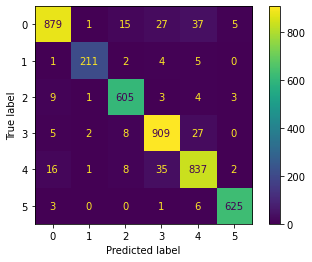

In [45]:
get_scores(gridsearch, X_test, y_test)

##  Logistic Regression (LogisticRegressionCV)

In [47]:
# create a Pipeline that will do features transformation then pass to the model
clf_LRCV = Pipeline(steps=[
    ('features', TfidfVectorizer(**tfidf_params)),
    ('model',  LogisticRegressionCV(cv=5,solver='saga',scoring='accuracy', random_state=42, n_jobs=-1))
])

#to chose solver from documentation:
#For small datasets, ‘liblinear’ is a good choice,
#whereas ‘sag’ and ‘saga’ are faster for large ones;
#For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ 
#and ‘lbfgs’ handle multinomial loss;

In [48]:
clf_LRCV.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

Pipeline(steps=[('features',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('model',
                 LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42,
                                      scoring='accuracy', solver='saga'))])

              precision    recall  f1-score   support

        Book       0.91      0.96      0.93       964
     Grocery       0.96      0.83      0.89       223
       Music       0.97      0.93      0.95       625
      Office       0.93      0.94      0.94       951
         Toy       0.93      0.92      0.92       899
       Watch       0.99      0.98      0.99       635

    accuracy                           0.94      4297
   macro avg       0.95      0.93      0.94      4297
weighted avg       0.94      0.94      0.94      4297



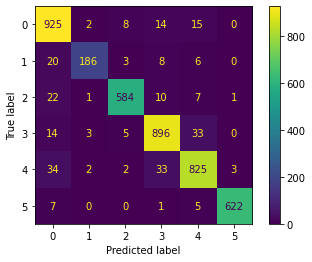

In [50]:
get_scores(clf_LRCV, X_test, y_test)

In [51]:
# checking the model params for the gridsearch
clf_LRCV.get_params()

{'memory': None,
 'steps': [('features',
   TfidfVectorizer(min_df=5, ngram_range=(1, 2), stop_words='english',
                   sublinear_tf=True)),
  ('model',
   LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42, scoring='accuracy',
                        solver='saga'))],
 'verbose': False,
 'features': TfidfVectorizer(min_df=5, ngram_range=(1, 2), stop_words='english',
                 sublinear_tf=True),
 'model': LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42, scoring='accuracy',
                      solver='saga'),
 'features__analyzer': 'word',
 'features__binary': False,
 'features__decode_error': 'strict',
 'features__dtype': numpy.float64,
 'features__encoding': 'utf-8',
 'features__input': 'content',
 'features__lowercase': True,
 'features__max_df': 1.0,
 'features__max_features': None,
 'features__min_df': 5,
 'features__ngram_range': (1, 2),
 'features__norm': 'l2',
 'features__preprocessor': None,
 'features__smooth_idf': True,
 'features__stop_words': '

In [57]:
clf_LRCV_parameter_grid = {
    'features__min_df': [1, 10],
    'features__max_df': [0.01, 0.05, 0.1, 0.5],
    'features__ngram_range': [(1,3), (1,4)],
    'model__solver': ['saga', 'liblinear']
}

In [58]:
gridsearch_LRCV = GridSearchCV(clf_LRCV,
                          clf_LRCV_parameter_grid,
                          scoring = None,
                          verbose = 3
                         )

In [59]:
gridsearch_LRCV.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.944 total time=  32.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.929 total time=  30.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.931 total time=  34.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.936 total time=  33.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.930 total time=  28.9s


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.945 total time=   9.6s
[CV 2/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.930 total time=   9.2s
[CV 3/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.932 total time=   8.1s
[CV 4/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.935 total time=   8.8s
[CV 5/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.931 total time=   8.6s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.942 total time=  43.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.926 total time=  42.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.930 total time=  47.8s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.937 total time=  44.8s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.929 total time=  39.0s


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.943 total time=  13.7s
[CV 2/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.928 total time=  12.0s
[CV 3/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.929 total time=  12.3s
[CV 4/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.936 total time=  11.9s
[CV 5/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.930 total time=  12.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.907 total time=   3.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.900 total time=   3.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.892 total time=   3.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.899 total time=   2.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.892 total time=   2.9s
[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.904 total time=   1.8s
[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.897 total time=   1.8s
[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.893 total time=   1.8s
[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.896 total time=   1.8s
[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.892 total time=   1.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.906 total time=   3.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.900 total time=   3.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.892 total time=   3.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.899 total time=   3.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.892 total time=   3.1s
[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.904 total time=   2.1s
[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.897 total time=   2.0s
[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.893 total time=   2.0s
[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.896 total time=   2.1s
[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.892 total time=   2.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.942 total time=  25.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.937 total time=  26.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.935 total time=  24.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.939 total time=  24.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.934 total time=  24.7s


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.943 total time=   9.7s
[CV 2/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.937 total time=   8.7s
[CV 3/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.937 total time=   8.9s
[CV 4/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.941 total time=   8.7s
[CV 5/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.936 total time=   8.8s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.941 total time=  33.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.934 total time=  34.6s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.932 total time=  33.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.936 total time=  32.8s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.930 total time=  33.5s


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.940 total time=  14.3s
[CV 2/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.935 total time=  13.0s
[CV 3/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.935 total time=  12.4s
[CV 4/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.937 total time=  12.2s
[CV 5/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.933 total time=  12.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.919 total time=   3.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.917 total time=   3.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.914 total time=   3.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.914 total time=   3.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.915 total time=   3.2s
[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.919 total time=   2.1s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.915 total time=   2.0s
[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.909 total time=   2.0s
[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.914 total time=   2.1s
[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.912 total time=   2.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.919 total time=   3.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.917 total time=   3.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.914 total time=   3.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.914 total time=   3.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.915 total time=   3.5s
[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.919 total time=   2.2s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.915 total time=   2.2s
[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.907 total time=   2.3s
[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.914 total time=   2.2s
[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.912 total time=   2.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.942 total time=  24.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.936 total time=  25.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.932 total time=  24.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.941 total time=  24.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.936 total time=  24.4s


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.944 total time=  10.1s
[CV 2/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.938 total time=   9.4s
[CV 3/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.937 total time=   8.6s
[CV 4/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.942 total time=   9.1s
[CV 5/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.936 total time=   8.8s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.941 total time=  32.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.935 total time=  34.8s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.930 total time=  33.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.938 total time=  31.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.930 total time=  32.6s


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.941 total time=  14.1s
[CV 2/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.933 total time=  12.6s
[CV 3/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.933 total time=  12.4s
[CV 4/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.939 total time=  12.5s
[CV 5/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.933 total time=  12.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.919 total time=   3.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.916 total time=   3.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.912 total time=   3.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.916 total time=   3.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.914 total time=   3.4s
[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.918 total time=   2.1s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.915 total time=   2.1s
[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.915 total time=   2.1s
[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.917 total time=   2.1s
[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.914 total time=   2.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.919 total time=   3.6s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.916 total time=   3.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.912 total time=   3.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.916 total time=   3.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.914 total time=   3.7s
[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.918 total time=   2.4s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.915 total time=   2.5s
[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.915 total time=   2.4s
[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.917 total time=   2.4s
[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.914 total time=   2.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.944 total time=  23.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.941 total time=  24.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.936 total time=  23.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.945 total time=  22.8s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__solver=saga;, score=0.938 total time=  23.3s


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.946 total time=  10.0s
[CV 2/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.942 total time=   8.7s
[CV 3/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.941 total time=   8.8s
[CV 4/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.946 total time=   8.9s
[CV 5/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.939 total time=   8.8s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.944 total time=  31.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.939 total time=  31.6s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.935 total time=  31.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.943 total time=  31.6s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__solver=saga;, score=0.933 total time=  31.1s


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.943 total time=  14.9s
[CV 2/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.936 total time=  13.2s
[CV 3/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.937 total time=  13.4s
[CV 4/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.944 total time=  13.2s
[CV 5/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.937 total time=  13.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.924 total time=   3.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.919 total time=   3.6s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.917 total time=   3.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.921 total time=   3.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__solver=saga;, score=0.917 total time=   3.5s
[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.925 total time=   2.3s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.919 total time=   2.2s
[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.919 total time=   2.2s
[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.921 total time=   2.2s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__solver=liblinear;, score=0.917 total time=   2.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.924 total time=   3.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.919 total time=   3.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.917 total time=   3.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.922 total time=   3.6s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__solver=saga;, score=0.917 total time=   3.6s
[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.925 total time=   2.4s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.919 total time=   2.3s
[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.919 total time=   2.3s
[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.921 total time=   2.3s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__solver=liblinear;, score=0.917 total time=   2.3s


GridSearchCV(estimator=Pipeline(steps=[('features',
                                        TfidfVectorizer(min_df=5,
                                                        ngram_range=(1, 2),
                                                        stop_words='english',
                                                        sublinear_tf=True)),
                                       ('model',
                                        LogisticRegressionCV(cv=5, n_jobs=-1,
                                                             random_state=42,
                                                             scoring='accuracy',
                                                             solver='saga'))]),
             param_grid={'features__max_df': [0.01, 0.05, 0.1, 0.5],
                         'features__min_df': [1, 10],
                         'features__ngram_range': [(1, 3), (1, 4)],
                         'model__solver': ['saga', 'liblinear']},
             verbose=3)

In [60]:
gridsearch_LRCV.best_params_ , gridsearch_LRCV.best_estimator_

({'features__max_df': 0.5,
  'features__min_df': 1,
  'features__ngram_range': (1, 3),
  'model__solver': 'liblinear'},
 Pipeline(steps=[('features',
                  TfidfVectorizer(max_df=0.5, ngram_range=(1, 3),
                                  stop_words='english', sublinear_tf=True)),
                 ('model',
                  LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42,
                                       scoring='accuracy',
                                       solver='liblinear'))]))

              precision    recall  f1-score   support

        Book       0.94      0.94      0.94       964
     Grocery       0.96      0.91      0.94       223
       Music       0.96      0.95      0.95       625
      Office       0.93      0.94      0.93       951
         Toy       0.92      0.92      0.92       899
       Watch       0.98      0.98      0.98       635

    accuracy                           0.94      4297
   macro avg       0.95      0.94      0.94      4297
weighted avg       0.94      0.94      0.94      4297



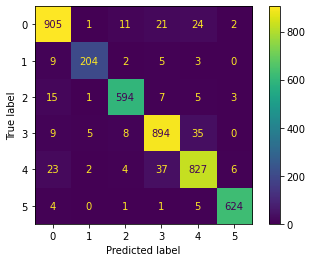

In [61]:
get_scores(gridsearch_LRCV, X_test, y_test)

 ## LinearSVC

In [78]:
tfidf_params = dict(sublinear_tf = True,
                   min_df = 1,
                   norm = 'l2',
                   ngram_range=(1,4),
                   stop_words = 'english')

In [80]:
# create a Pipeline that will do features transformation then pass to the model
clf_LSVC = Pipeline(steps=[
    ('features', TfidfVectorizer(**tfidf_params)),
    ('model',  LinearSVC(loss='hinge',random_state=42, max_iter=2000))
])


In [81]:
# Use classifier pipeline as a model, fit X_train and y_train
clf_LSVC.fit(X_train, y_train)

Pipeline(steps=[('features',
                 TfidfVectorizer(ngram_range=(1, 4), stop_words='english',
                                 sublinear_tf=True)),
                ('model',
                 LinearSVC(loss='hinge', max_iter=2000, random_state=42))])

              precision    recall  f1-score   support

        Book       0.94      0.94      0.94       964
     Grocery       0.94      0.91      0.92       223
       Music       0.96      0.94      0.95       625
      Office       0.91      0.94      0.93       951
         Toy       0.91      0.91      0.91       899
       Watch       0.98      0.98      0.98       635

    accuracy                           0.94      4297
   macro avg       0.94      0.94      0.94      4297
weighted avg       0.94      0.94      0.94      4297



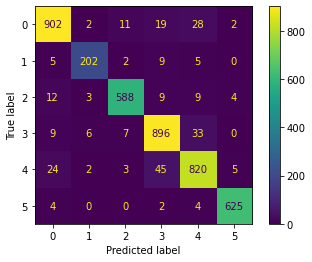

In [82]:
get_scores(clf_LSVC, X_test, y_test)

In [85]:
clf_LSVC.get_params()

{'memory': None,
 'steps': [('features',
   TfidfVectorizer(ngram_range=(1, 4), stop_words='english', sublinear_tf=True)),
  ('model', LinearSVC(loss='hinge', max_iter=2000, random_state=42))],
 'verbose': False,
 'features': TfidfVectorizer(ngram_range=(1, 4), stop_words='english', sublinear_tf=True),
 'model': LinearSVC(loss='hinge', max_iter=2000, random_state=42),
 'features__analyzer': 'word',
 'features__binary': False,
 'features__decode_error': 'strict',
 'features__dtype': numpy.float64,
 'features__encoding': 'utf-8',
 'features__input': 'content',
 'features__lowercase': True,
 'features__max_df': 1.0,
 'features__max_features': None,
 'features__min_df': 1,
 'features__ngram_range': (1, 4),
 'features__norm': 'l2',
 'features__preprocessor': None,
 'features__smooth_idf': True,
 'features__stop_words': 'english',
 'features__strip_accents': None,
 'features__sublinear_tf': True,
 'features__token_pattern': '(?u)\\b\\w\\w+\\b',
 'features__tokenizer': None,
 'features__use_i

In [91]:
clf_LSVC_parameter_grid = {
    'features__min_df': [1, 10],
    'features__max_df': [0.01, 0.05, 0.1, 0.5],
    'features__ngram_range': [(1,3), (1,4)],
    'model__C': list(range(1,11))
}

In [92]:
gridsearch_LSVC = GridSearchCV(clf_LSVC,
                          clf_LSVC_parameter_grid,
                          scoring = None,
                          verbose = 3
                         )

In [93]:
gridsearch_LSVC.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.944 total time=   1.9s
[CV 2/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.930 total time=   2.4s
[CV 3/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.935 total time=   1.6s
[CV 4/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.940 total time=   1.6s
[CV 5/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.933 total time=   1.8s
[CV 1/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__C=2;, score=0.947 total time=   2.4s
[CV 2/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 3), model__C=2;, score=0.933 total time=   2.6s
[CV 3/5] END features__max_

[CV 4/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__C=3;, score=0.939 total time=   4.1s
[CV 5/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__C=3;, score=0.933 total time=   2.3s
[CV 1/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.944 total time=   2.3s
[CV 2/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.931 total time=   4.2s
[CV 3/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.935 total time=   2.7s
[CV 4/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.939 total time=   3.6s
[CV 5/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.933 total time=   2.3s
[CV 1/5] END features__max_df=0.01, features__min_df=1, features__ngram_range=(1, 4), mode

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.900 total time=   1.0s
[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.891 total time=   1.0s
[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.906 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.896 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.891 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.898 total time=   1.2s
[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.887 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.905 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.894 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.890 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.894 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.891 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.902 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.892 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.890 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.891 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.889 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.901 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.889 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.888 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.889 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.885 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.899 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.890 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.886 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.888 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.884 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.897 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.889 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.884 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.887 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.884 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.896 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.887 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.882 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.885 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.882 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.893 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.886 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.881 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.885 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.881 total time=   1.3s
[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.907 total time=   0.9s
[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.899 total time=   1.1s
[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.899 total time=   0.9s
[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.905 total time=   1.0s
[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.896 total time=   0.9s
[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.905 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.898 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.894 total time=   1.2s
[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.900 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.891 total time=   1.1s
[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.906 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.896 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.891 total time=   1.2s
[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.898 total time=   1.2s
[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.888 total time=   1.2s
[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.904 total time=   1.3s
[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.894 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.890 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.894 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.890 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.903 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.892 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.889 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.891 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.888 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.901 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.889 total time=   1.4s
[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.888 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.889 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.885 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.898 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.890 total time=   1.4s
[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.886 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.888 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.885 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.897 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.888 total time=   1.5s
[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.885 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.888 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.885 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.896 total time=   1.6s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.888 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.882 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.886 total time=   1.6s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.882 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.893 total time=   1.6s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.886 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.882 total time=   1.6s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.885 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.01, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.882 total time=   1.5s
[CV 1/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.946 total time=   1.4s
[CV 2/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.939 total time=   1.4s
[CV 3/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.939 total time=   1.4s
[CV 4/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.943 total time=   1.5s
[CV 5/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.938 total time=   1.3s
[CV 1/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), model__C=2;, score=0.946 total time=   1.6s
[CV 2/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 3), mo

[CV 3/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__C=3;, score=0.939 total time=   2.8s
[CV 4/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__C=3;, score=0.940 total time=   3.0s
[CV 5/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__C=3;, score=0.938 total time=   2.8s
[CV 1/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.944 total time=   3.3s
[CV 2/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.938 total time=   2.9s
[CV 3/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.939 total time=   2.7s
[CV 4/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.940 total time=   2.9s
[CV 5/5] END features__max_df=0.05, features__min_df=1, features__ngram_range=(1, 4), mode

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=1;, score=0.922 total time=   1.0s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=1;, score=0.913 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=1;, score=0.915 total time=   0.9s
[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=1;, score=0.917 total time=   0.8s
[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=1;, score=0.919 total time=   0.8s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.923 total time=   1.1s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.912 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.914 total time=   1.0s
[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.916 total time=   0.9s
[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.917 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.917 total time=   1.0s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.912 total time=   1.0s
[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.911 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.915 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.914 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.916 total time=   1.2s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.913 total time=   1.0s
[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.908 total time=   1.0s
[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.912 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.914 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.914 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.911 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.908 total time=   1.1s
[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.910 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.910 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.914 total time=   1.3s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.908 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.906 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.910 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.909 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.915 total time=   1.3s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.907 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.903 total time=   1.3s
[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.907 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.908 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.914 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.905 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.902 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.907 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.906 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.912 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.904 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.901 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.905 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.904 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.910 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.905 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.900 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.905 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.903 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.922 total time=   1.1s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.913 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.916 total time=   1.1s
[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.917 total time=   1.0s
[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.919 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.924 total time=   1.3s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.913 total time=   1.1s
[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.914 total time=   1.1s
[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.916 total time=   1.1s
[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.917 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.917 total time=   1.3s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.912 total time=   1.3s
[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.911 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.915 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.914 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.916 total time=   1.4s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.912 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.908 total time=   1.2s
[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.912 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.913 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.914 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.910 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.907 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.910 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.910 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.914 total time=   1.5s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.908 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.906 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.909 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.909 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.915 total time=   1.4s
[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.907 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.904 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.907 total time=   1.4s
[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.908 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.914 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.905 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.902 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.907 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.906 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.912 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.904 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.901 total time=   1.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.905 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.904 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.910 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.904 total time=   1.6s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.900 total time=   1.7s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.905 total time=   1.5s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.05, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.903 total time=   1.6s
[CV 1/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.945 total time=   1.7s
[CV 2/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.939 total time=   2.0s
[CV 3/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.938 total time=   1.7s
[CV 4/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.944 total time=   1.8s
[CV 5/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.937 total time=   1.7s
[CV 1/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__C=2;, score=0.946 total time=   2.1s
[CV 2/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 3), model__C=

[CV 4/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__C=3;, score=0.941 total time=   2.8s
[CV 5/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__C=3;, score=0.938 total time=   2.6s
[CV 1/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.946 total time=   2.6s
[CV 2/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.939 total time=   2.7s
[CV 3/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.937 total time=   2.7s
[CV 4/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.941 total time=   2.9s
[CV 5/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.938 total time=   2.8s
[CV 1/5] END features__max_df=0.1, features__min_df=1, features__ngram_range=(1, 4), model__C=5;,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.922 total time=   1.2s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.915 total time=   0.8s
[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.915 total time=   0.8s
[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.917 total time=   0.9s
[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.921 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.920 total time=   1.0s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.913 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.914 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.918 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.916 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.917 total time=   1.1s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.913 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.911 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.914 total time=   1.1s
[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.914 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.915 total time=   1.2s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.911 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.910 total time=   1.0s
[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.911 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.913 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.914 total time=   1.1s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.908 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.907 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.910 total time=   1.1s
[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.913 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.914 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.905 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.907 total time=   1.1s
[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.909 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.911 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.913 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.905 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.906 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.908 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.910 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.912 total time=   1.2s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.904 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.905 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.908 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.908 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.911 total time=   1.2s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.903 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.903 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.906 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.906 total time=   1.1s
[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.923 total time=   0.9s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.916 total time=   0.9s
[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.917 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.919 total time=   0.9s
[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.920 total time=   0.8s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.921 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.915 total time=   1.0s
[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.915 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.917 total time=   1.1s
[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.921 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.920 total time=   1.4s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.913 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.915 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.918 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.916 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.917 total time=   1.3s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.913 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.911 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.914 total time=   1.2s
[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.914 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.915 total time=   1.3s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.911 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.910 total time=   1.1s
[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.911 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.913 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.914 total time=   1.3s
[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.908 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.908 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.910 total time=   1.2s
[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.913 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.914 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.905 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.906 total time=   1.3s
[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.909 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.911 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.913 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.905 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.906 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.908 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.910 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.912 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.904 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.905 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.908 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.907 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.911 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.903 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.903 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.906 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.1, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.906 total time=   1.2s
[CV 1/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.947 total time=   1.4s
[CV 2/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.942 total time=   1.4s
[CV 3/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.942 total time=   1.3s
[CV 4/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.947 total time=   1.4s
[CV 5/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__C=1;, score=0.939 total time=   1.4s
[CV 1/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__C=2;, score=0.948 total time=   1.5s
[CV 2/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 3), model__C=2

[CV 4/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__C=3;, score=0.946 total time=   2.2s
[CV 5/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__C=3;, score=0.940 total time=   2.0s
[CV 1/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.948 total time=   2.2s
[CV 2/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.942 total time=   2.2s
[CV 3/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.942 total time=   2.0s
[CV 4/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.946 total time=   2.1s
[CV 5/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__C=4;, score=0.940 total time=   2.2s
[CV 1/5] END features__max_df=0.5, features__min_df=1, features__ngram_range=(1, 4), model__C=5;,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=1;, score=0.923 total time=   0.7s
[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=1;, score=0.926 total time=   0.7s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=1;, score=0.921 total time=   0.6s
[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.924 total time=   0.7s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.919 total time=   0.8s
[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.919 total time=   0.7s
[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.922 total time=   0.8s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=2;, score=0.922 total time=   0.8s
[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.921 total time=   0.9s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.918 total time=   0.8s
[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.918 total time=   0.8s
[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.921 total time=   0.8s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=3;, score=0.919 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.919 total time=   1.0s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.918 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.915 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.919 total time=   1.0s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=4;, score=0.917 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.918 total time=   1.1s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.915 total time=   0.8s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.914 total time=   1.0s
[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.917 total time=   1.0s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=5;, score=0.917 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.916 total time=   1.1s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.911 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.912 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.915 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=6;, score=0.917 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.916 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.910 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.910 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.914 total time=   1.1s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=7;, score=0.916 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.914 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.909 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.910 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.914 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=8;, score=0.914 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.913 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.907 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.908 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.912 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=9;, score=0.912 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.912 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.907 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.907 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.911 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 3), model__C=10;, score=0.911 total time=   1.2s
[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.927 total time=   0.8s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.919 total time=   0.8s
[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.922 total time=   0.9s
[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.926 total time=   0.8s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=1;, score=0.921 total time=   0.8s
[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.924 total time=   1.0s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), mod

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.921 total time=   1.0s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=2;, score=0.922 total time=   1.0s
[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.921 total time=   1.1s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.918 total time=   1.1s
[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.918 total time=   0.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.921 total time=   1.1s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=3;, score=0.919 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.919 total time=   1.2s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.918 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.915 total time=   1.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.919 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=4;, score=0.917 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.918 total time=   1.3s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.915 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.914 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.916 total time=   1.2s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=5;, score=0.917 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.916 total time=   1.3s
[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.911 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.912 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.916 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=6;, score=0.917 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.916 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.909 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.910 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.914 total time=   1.3s
[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=7;, score=0.916 total time=   1.1s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.914 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.909 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.910 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.913 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=8;, score=0.914 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.913 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.908 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.908 total time=   1.2s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.912 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=9;, score=0.912 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.912 total time=   1.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.908 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.907 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.911 total time=   1.3s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END features__max_df=0.5, features__min_df=10, features__ngram_range=(1, 4), model__C=10;, score=0.911 total time=   1.3s


GridSearchCV(estimator=Pipeline(steps=[('features',
                                        TfidfVectorizer(ngram_range=(1, 4),
                                                        stop_words='english',
                                                        sublinear_tf=True)),
                                       ('model',
                                        LinearSVC(loss='hinge', max_iter=2000,
                                                  random_state=42))]),
             param_grid={'features__max_df': [0.01, 0.05, 0.1, 0.5],
                         'features__min_df': [1, 10],
                         'features__ngram_range': [(1, 3), (1, 4)],
                         'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=3)

In [100]:
gridsearch_LSVC.best_params_ , gridsearch_LSVC.best_estimator_

({'features__max_df': 0.5,
  'features__min_df': 1,
  'features__ngram_range': (1, 3),
  'model__C': 2},
 Pipeline(steps=[('features',
                  TfidfVectorizer(max_df=0.5, ngram_range=(1, 3),
                                  stop_words='english', sublinear_tf=True)),
                 ('model',
                  LinearSVC(C=2, loss='hinge', max_iter=2000, random_state=42))]))

              precision    recall  f1-score   support

        Book       0.95      0.93      0.94       964
     Grocery       0.95      0.94      0.95       223
       Music       0.96      0.95      0.96       625
      Office       0.93      0.95      0.94       951
         Toy       0.92      0.92      0.92       899
       Watch       0.98      0.99      0.98       635

    accuracy                           0.94      4297
   macro avg       0.95      0.95      0.95      4297
weighted avg       0.94      0.94      0.94      4297



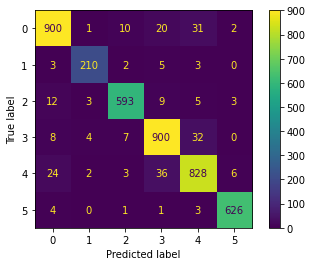

In [101]:
get_scores(gridsearch_LSVC, X_test, y_test)

# Task 4 
### Add a prediction label to the original dataframe & plot the results divided by category & number of correct predictions.


In [66]:
# Repeated/reminder cell: The  MNB model (multinomial Naive Bayes) gave us best results, the best parameters are saved already in 'gridsearch'
gridsearch.best_params_ , gridsearch.best_estimator_

({'features__max_df': 0.5,
  'features__min_df': 1,
  'features__ngram_range': (1, 4),
  'model__alpha': 0.01},
 Pipeline(steps=[('features',
                  TfidfVectorizer(max_df=0.5, ngram_range=(1, 4),
                                  stop_words='english', sublinear_tf=True)),
                 ('model', MultinomialNB(alpha=0.01))]))

              precision    recall  f1-score   support

        Book       0.96      0.91      0.94       964
     Grocery       0.98      0.95      0.96       223
       Music       0.95      0.97      0.96       625
      Office       0.93      0.96      0.94       951
         Toy       0.91      0.93      0.92       899
       Watch       0.98      0.98      0.98       635

    accuracy                           0.95      4297
   macro avg       0.95      0.95      0.95      4297
weighted avg       0.95      0.95      0.95      4297



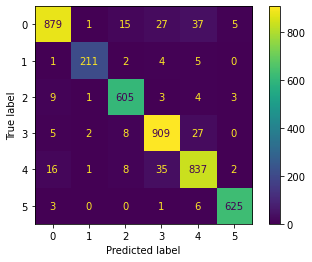

In [143]:
# Repeated/reminder cell: To see the performance of the MNB pipeline:
get_scores(gridsearch, X_test, y_test)

Now the best_pipe (based on gridsearch of best obtained tfidf params and MNB model) is build:

In [67]:
# Assign the best_tfidf parameters according to the gridsearch.best_params_: 
best_tfidf_params = dict(sublinear_tf = True,
                   min_df = 1,
                   norm = 'l2',
                   ngram_range=(1,4),
                   stop_words = 'english')

In [132]:
# creating the best_pipe according to the gridsearch.best_params_: 
best_pipe = Pipeline(steps=[
    ('features', TfidfVectorizer(**best_tfidf_params)),
    ('model',  MultinomialNB(alpha=0.01))
])

In [133]:
# Task 4 wants to add a prediction lable to the original df (no need to do train_test_split) 
# Therefore just applied the 'best_pipe' on the whole data. 

# Reminder: In the beginning I prepared the corpus and labels of the original df in form of a list
# corpus = df['Title'].tolist()
# labels = df['Category'].tolist()

best_pipe.fit(corpus,labels)


Pipeline(steps=[('features',
                 TfidfVectorizer(ngram_range=(1, 4), stop_words='english',
                                 sublinear_tf=True)),
                ('model', MultinomialNB(alpha=0.01))])

In [134]:
Pred_Cat = best_pipe.predict(corpus)

In [135]:
df_task4 = pd.DataFrame({'Title': corpus, 'Category': labels, 'Pred_Cat':Pred_Cat})
df_task4.head()

,Title,Category,Pred_Cat
0,Apli Kids Roll of Stickers Round Ø 15 mm Pink,Office,Office
1,MAXEE Golden Balloon 32 Inch Birthday Balloon ...,Toy,Toy
2,STAEDTLER 550 02 Noris School Compass with Cen...,Office,Office
3,Liebeskind Berlin Women's Analogue Quartz Cloc...,Watch,Watch
4,"Pool Toys for Kids Adults, 2 Packs Water Guns ...",Toy,Toy


<AxesSubplot:xlabel='Category'>

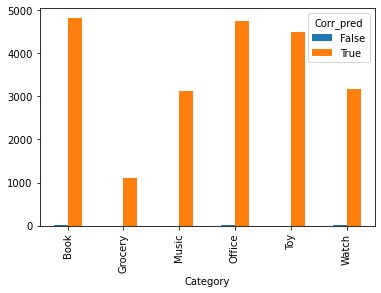

In [136]:
mask = df_task4['Category'] == df_task4['Pred_Cat']
df_task4.loc[mask, 'Corr_pred'] = True
df_task4.loc[~mask, 'Corr_pred'] = False
df_task4.groupby(['Category','Corr_pred'])['Corr_pred'].count().unstack().plot.bar()


<AxesSubplot:xlabel='Category'>

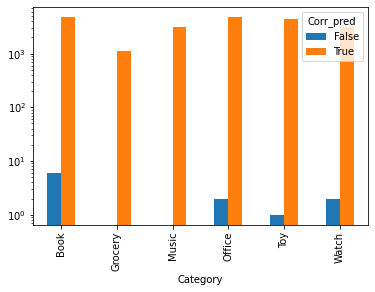

In [137]:
# For a better visualization, assign "log" scaling for the count axis. 
# Please consider log scale for interpratation!

df_task4.groupby(['Category','Corr_pred'])['Corr_pred'].count().unstack().plot.bar(logy=True)

# Task 5.
### Update the "predictions" dictionary with the corresponding prediction from the final model. Use the pipeline!

In [111]:
predictions = {
    
"Classical Flute in C": None,

"Harry Potter & the prisioner of Azkaban hardcover": None,

"Digital casio with alarm": None,

"Document shredder with three velocities": None,

"Puzzle 1000 pieces Mona Lisa": None,

"Pringles sour cream an onion 12 pack": None

                }

In [138]:
corpus_task5 = list(predictions.keys()) 
preds_task5 = best_pipe.predict(corpus_task5)
print(preds_task5)

['Music' 'Book' 'Watch' 'Office' 'Toy' 'Grocery']


In [139]:
df_task5 = pd.DataFrame({'Title': corpus_task5,  'Prediction':preds_task5})
df_task5

,Title,Prediction
0,Classical Flute in C,Music
1,Harry Potter & the prisioner of Azkaban hardcover,Book
2,Digital casio with alarm,Watch
3,Document shredder with three velocities,Office
4,Puzzle 1000 pieces Mona Lisa,Toy
5,Pringles sour cream an onion 12 pack,Grocery


In [149]:
# updating the 'predictions' dictionary:
predictions = dict(zip(df_task5['Title'], df_task5['Prediction']))
predictions

{'Classical Flute in C': 'Music',
 'Harry Potter & the prisioner of Azkaban hardcover': 'Book',
 'Digital casio with alarm': 'Watch',
 'Document shredder with three velocities': 'Office',
 'Puzzle 1000 pieces Mona Lisa': 'Toy',
 'Pringles sour cream an onion 12 pack': 'Grocery'}

# Task 6.
### Optional: attached with the results include a .joblib file called "category_classifier" with the model ready to use.


In [140]:
import joblib

In [150]:
# saving the pipeline (instead of the model), which includes vectorization:
joblib.dump(best_pipe, 'category_classifier.joblib')

['category_classifier.joblib']

# Optional Task (in Green)

### Check if model performance increases with removing the non-english entries.

In [95]:
df_en = df_original.copy()

In [96]:
df_en.head()

,Category,Title
0,Office,Apli Kids Roll of Stickers Round Ø 15 mm Pink
1,Toy,MAXEE Golden Balloon 32 Inch Birthday Balloon ...
2,Office,STAEDTLER 550 02 Noris School Compass with Cen...
3,Watch,Liebeskind Berlin Women's Analogue Quartz Cloc...
4,Toy,"Pool Toys for Kids Adults, 2 Packs Water Guns ..."


There are several libraries for language detection i.e. spaCy, TextBlob, Pycld2 etc.
For this task regardless of the pros and cons, I chose one just for a rough cleaning 
and check the model performance


In [97]:
# defining two custom functions to extract the language and its probability from the output:

def get_lan(mystring):
    try:
        result = langdetect.detect_langs(mystring)
        lan = str(result[0])[:2]
    except:
        lan = 'unknown'
    return lan

def get_lan_prob(mystring):
    try:
        result = langdetect.detect_langs(mystring)
        lan_prob = float(str(result[0])[3:7])
    except:
        lan_prob = 1.0
    return lan_prob

In [124]:
df_en['Lan'] = df_en['Title'].apply(get_lan)
df_en['Lan_Prob'] = df_en['Title'].apply(get_lan_prob) # not needed for now, just for further checks in case needed!

In [125]:
df_en

,Category,Title,Lan,Lan_Prob
0,Office,Apli Kids Roll of Stickers Round Ø 15 mm Pink,en,0.99
1,Toy,MAXEE Golden Balloon 32 Inch Birthday Balloon ...,en,0.99
2,Office,STAEDTLER 550 02 Noris School Compass with Cen...,en,0.99
3,Watch,Liebeskind Berlin Women's Analogue Quartz Cloc...,de,0.99
4,Toy,"Pool Toys for Kids Adults, 2 Packs Water Guns ...",en,0.99
...,...,...,...,...
21479,Office,"Baier & Schneider Book, Book Cover, A6 – Clear",en,0.57
21480,Music,Jim Dunlop CBM95 Cry Baby Mini Wah,en,0.99
21481,Book,Les hommes viennent de Mars les femmes viennen...,fr,0.99
21482,Book,Le Pays De La Liberte (Ldp Litterature),fr,0.99


<AxesSubplot:>

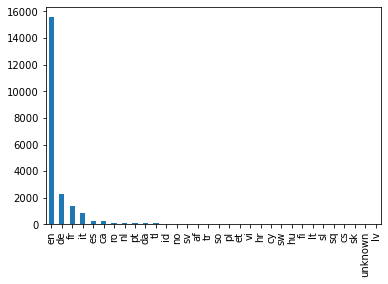

In [128]:
# Ploting counts of each detected Language.
df_en['Lan'].value_counts().plot(kind='bar')

In [130]:
# droping the non-english rows:
df_en = df_en.drop(df_en[df_en.Lan != 'en'].index)

              precision    recall  f1-score   support

        Book       0.93      0.73      0.82       250
     Grocery       0.97      0.91      0.94       151
       Music       0.95      0.98      0.96       529
      Office       0.95      0.96      0.96       844
         Toy       0.91      0.95      0.93       768
       Watch       0.99      0.98      0.99       570

    accuracy                           0.94      3112
   macro avg       0.95      0.92      0.93      3112
weighted avg       0.94      0.94      0.94      3112



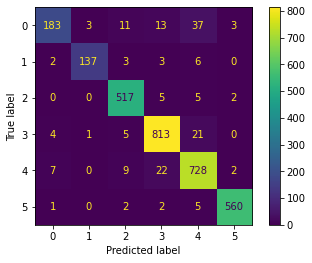

In [142]:
# preparing the corpus and labels in form of a list
corpus_en = df_en['Title'].tolist()
labels_en = df_en['Category'].tolist()
# Split
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(corpus_en,labels_en, test_size=0.2, random_state=42, stratify=labels_en)
# Fit on the english-only train dataset:
best_pipe.fit(X_train_en, y_train_en)
# Use the custom function for performance check:
get_scores(best_pipe, X_test_en, y_test_en)

Considering the f1-score, there is slight (1-2%) improvement for predicting some cathegories (Office, toy, watch), at the expense of decreased performance on other cathegories, and therefore the slightly decreased general f1-score. In general, removing non-english titles in this case did not help improving the model, even on the english-only dataset.
Here are further data cleaning suggestions to experiment for improvements:
- Trying other language detection models for removing non-english items.
- Further cleaning the Titles, e.g. by removing numbers etc. The english stopwords were already removed

### Thank you for taking time and going through this notebook.